In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(int(mean_absolute_error(true_values_train, pred_values_train))) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(int(mean_absolute_error(true_values_test, pred_values_test)))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

In [3]:
train = pd.read_csv('data_housing_model/train_housing_prepared')
train.drop('Id', axis=1, inplace=True)

In [11]:
train

,DistrictId,Rooms,Square,Floor,House_Floor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,house_age
0,35,2.0,47.981561,7.0,9.0,0.089040,1,1,33.0,7976.0,5.0,0,11.0,1,55.0
1,41,3.0,65.683640,7.0,9.0,0.000070,1,1,46.0,10309.0,1.0,1,16.0,1,46.0
2,53,2.0,44.947953,8.0,12.0,0.049637,1,1,34.0,7759.0,0.0,1,3.0,1,56.0
3,58,2.0,53.352981,8.0,17.0,0.437885,1,1,23.0,5735.0,3.0,0,5.0,1,47.0
4,99,1.0,39.649192,11.0,12.0,0.012339,1,1,35.0,5776.0,1.0,2,4.0,1,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,6.0,6.0,0.135650,1,1,46.0,7960.0,6.0,3,11.0,1,56.0
9996,18,1.0,41.521546,13.0,13.0,0.000000,1,1,30.0,5562.0,0.0,0,5.0,0,24.0
9997,27,1.0,47.939008,12.0,16.0,0.072158,1,1,2.0,629.0,1.0,0,0.0,0,9.0
9998,75,2.0,43.602562,1.0,5.0,0.307467,1,0,30.0,5048.0,9.0,2,5.0,1,63.0


In [4]:
y = pd.read_csv('data_housing_model/housing_y')
y.drop('Id', axis=1, inplace=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)

In [6]:
parameters = {
    'n_estimators': [100, 200, 250],
    'max_features': np.arange(5, 9),
    'max_depth': np.arange(5, 10),
}

clf = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=parameters,
    scoring='r2',
    cv=5,
)
clf.fit(X_train, y_train['Price'])

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': array([5, 6, 7, 8]),
                         'n_estimators': [100, 200, 250]},
             scoring='r2')

In [7]:
gb_model = clf.best_estimator_
clf.best_score_

0.7435318953617672

Train:	R2 = 0.891	MAE = 19712
Test:	R2 = 0.743	MAE = 27383


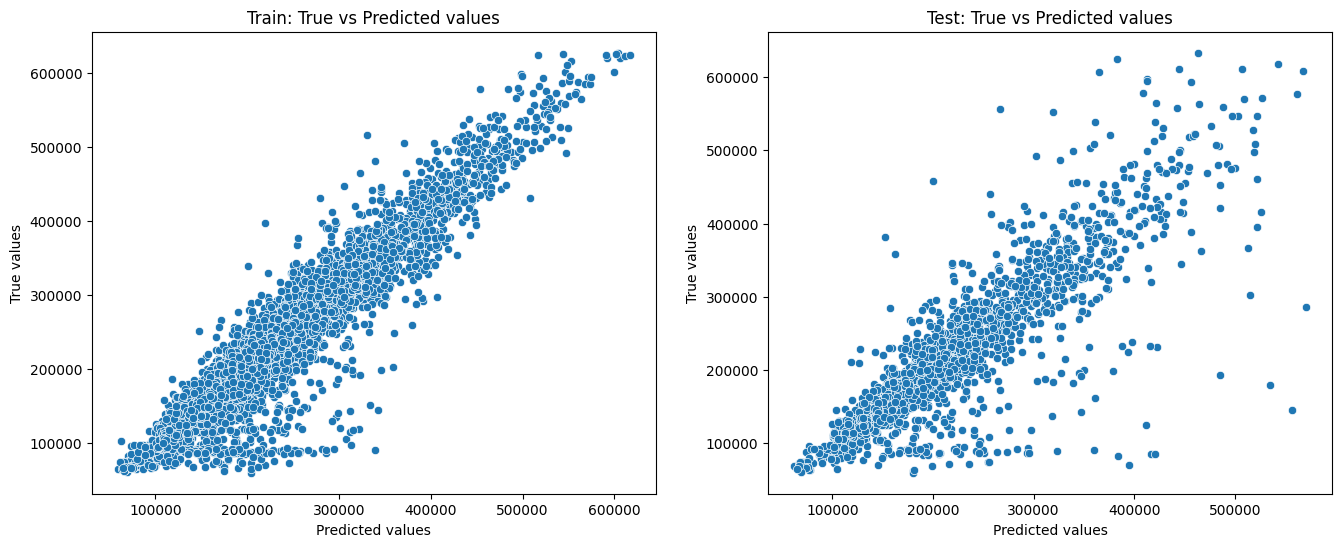

In [8]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_test)

evaluate_preds(pd.Series(y_train['Price']), y_train_preds.flatten(), pd.Series(y_test['Price']), y_test_preds.flatten())

In [9]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(gb_model, train, y['Price'], cv=cv, scoring='r2', n_jobs=-1)
print('R2 для случайного леса = ', round(scores.mean(), 4))

R2 для случайного леса =  0.7464


In [10]:
feature_importances = pd.DataFrame(zip(*[X_train.columns], gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances

,feature_name,importance
2,Square,0.347342
1,Rooms,0.172107
9,Social_2,0.087446
0,DistrictId,0.079616
10,Social_3,0.074796
8,Social_1,0.068077
5,Ecology_1,0.048897
14,house_age,0.046606
4,House_Floor,0.026554
12,Shops_1,0.019196


# удалим фичи с минимальной важностью

In [12]:
train = pd.read_csv('data_housing_model/train_housing_prepared')
train.drop(['Id', 'Ecology_3', 'Shops_2', 'Ecology_2'], axis=1, inplace=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)

In [14]:
parameters = {
    'n_estimators': [100, 200, 250],
    'max_features': np.arange(5, 9),
    'max_depth': np.arange(5, 10),
}

clf = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=parameters,
    scoring='r2',
    cv=5,
)
clf.fit(X_train, y_train['Price'])

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': array([5, 6, 7, 8]),
                         'n_estimators': [100, 200, 250]},
             scoring='r2')

In [15]:
gb_model = clf.best_estimator_
clf.best_score_

0.7440957226102481

Train:	R2 = 0.89	MAE = 19935
Test:	R2 = 0.733	MAE = 27756


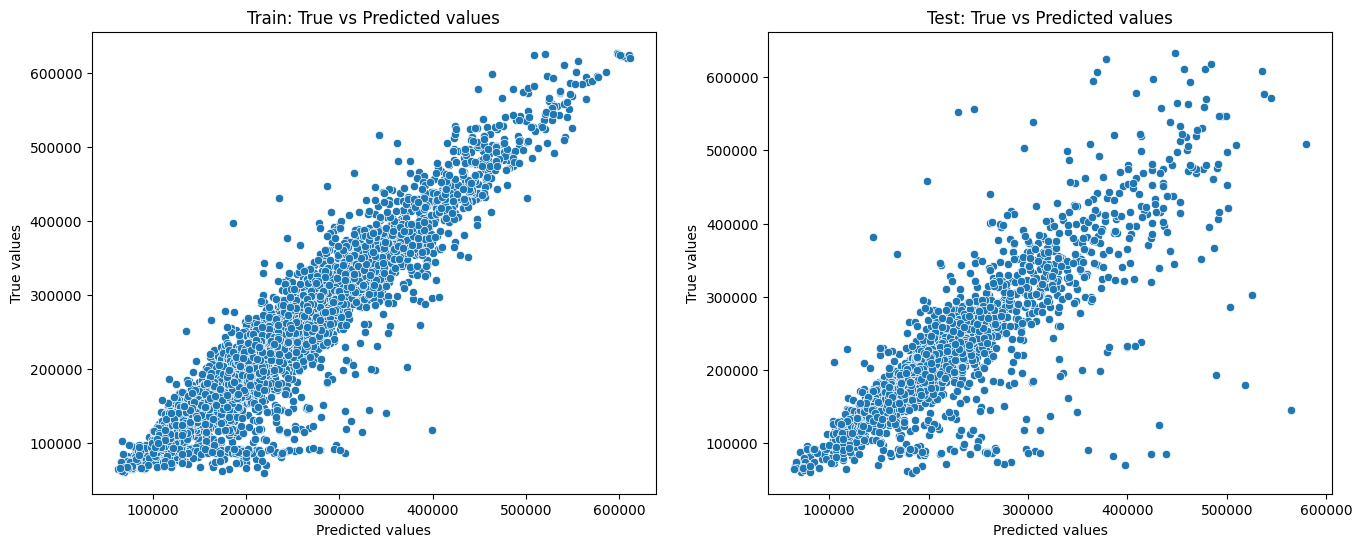

In [16]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_test)

evaluate_preds(pd.Series(y_train['Price']), y_train_preds.flatten(), pd.Series(y_test['Price']), y_test_preds.flatten())

In [17]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(gb_model, train, y['Price'], cv=cv, scoring='r2', n_jobs=-1)
print('R2 для случайного леса = ', round(scores.mean(), 4))

R2 для случайного леса =  0.746


In [19]:
test = pd.read_csv('/Users/alyona/Desktop/test_housing_prepared')
test.drop(['Id', 'Ecology_3', 'Shops_2', 'Ecology_2'], axis=1, inplace=True)

In [20]:
y_pred = gb_model.predict(test)

In [22]:
y_pred = pd.DataFrame(y_pred)

In [23]:
test_2 = pd.read_csv('data_housing_model/test_housing_prepared')

In [24]:
id_pred = test_2['Id']
id_pred = pd.DataFrame(id_pred)

In [25]:
result = pd.concat([id_pred, y_pred], axis=1)
result = result.rename(columns={0: 'Price'})
result

,Id,Price
0,725,172957.816688
1,15856,204851.882078
2,5480,147056.754158
3,15664,356318.001414
4,14275,137698.457196
...,...,...
4995,8180,244133.006238
4996,4695,138384.081826
4997,5783,335119.681522
4998,4780,186905.929867


In [26]:
result.to_csv('data_housing_model/predict.csv', index=False)